# Try to Use the TCN model on the Advizeo Electricity Consumption dataset

### —— TCN: Temporal Convolutional Network, Play Time Series Prediction with Convolutional Neural Network

---

### Project Participant

* CAI Yutong
* EFREI Paris
* E-mail: yutong.cai@efrei.net

### Reference Material

* Historical temperature data source: https://www.meteoblue.com/en/historyplus#try-for-free
* Temporal Convolutional Network (TCN) Summary: https://juejin.im/entry/5b1f90836fb9a01e842b1ae3
* Time Series Forecasting with Convolutional Neural Networks - a Look at WaveNet: https://jeddy92.github.io/JEddy92.github.io/ts_seq2seq_conv/
* High-Dimensional Time Series Forecasting with Convolutional Neural Networks:  https://github.com/JEddy92/TimeSeries_Seq2Seq/blob/master/notebooks/TS_Seq2Seq_Conv_Intro.ipynb

---

## 0. Why TCN

TCN is fundamentally different from ARIMA and LSTM. When using ARIMA and LSTM, we let the model learn the time series of a sample and predict the future trend of this sample. TCN can obtain models by learning other samples with similar trends, and predict trends based on historical data of target samples.

I found a tutorial project on TCF that can be applied to our Advizeo Electricity Consumption Project. That tutorial project is to use Temporal Convolutional Network (TCN) to forecasting the daily wikipedia web page traffic. It uses the web page traffic data obtained in 550 days in 40,000 web pages to fit the model through TCN.

By visualizing the data, we can see that the similarity of the data sample trend of our Advizeo Electricity Consumption is more similar than the similarity of the sample trend of the Web Page Traffic data. So maybe we can get a good predictive performance through TCN and our dataset when the sample data is sufficient.

But the reality we are facing is that we only have 10 Bâtiment (Building) accumulated electricity data in 264 days. When using one of them as test data and two as verification data, we only have 7 pieces of data for training our neural network. 

We can't use deep learning methods to get a satisfying model when the data is so poor. In the training process of the 50 Epochs that appeared later, we can see through the training-verification loss function and the loss function curve that we can't train a satisfactory prediction model with very little sample data.

However, when we draw the prediction result curve and compare it with the actual electricity consumption curve, we can find that the trend of the prediction curve has some similarities with the actual curve. This shows that the TCN algorithm has gained some predictive power after learning our data set. 

If we use the data set with sufficient sample data, we can get better prediction performance. For hotels, the same type of rooms should have the same trend of electricity and water consumption during the same period. The large number of rooms in the hotel can provide sufficient sample data for us to make better predictions.

When the time series is very short, it is difficult to make accurate predictions using ARIMA and LSTM, so TCN is also a solution to the problem if the similarity of trend changes between our data is high. It provides us with a new way to predict time series.

### 10 Bâtiment Daily Electricity Consumption Comparison Chart

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
dataset = pd.read_csv('sample_data.csv', index_col=0, parse_dates=[0])

In [125]:
data_day_mean = dataset[['Bat1','Bat2','Bat3','Bat4','Bat5','Bat6','Bat7','Bat8','Bat9','Bat10']].resample('D').mean()

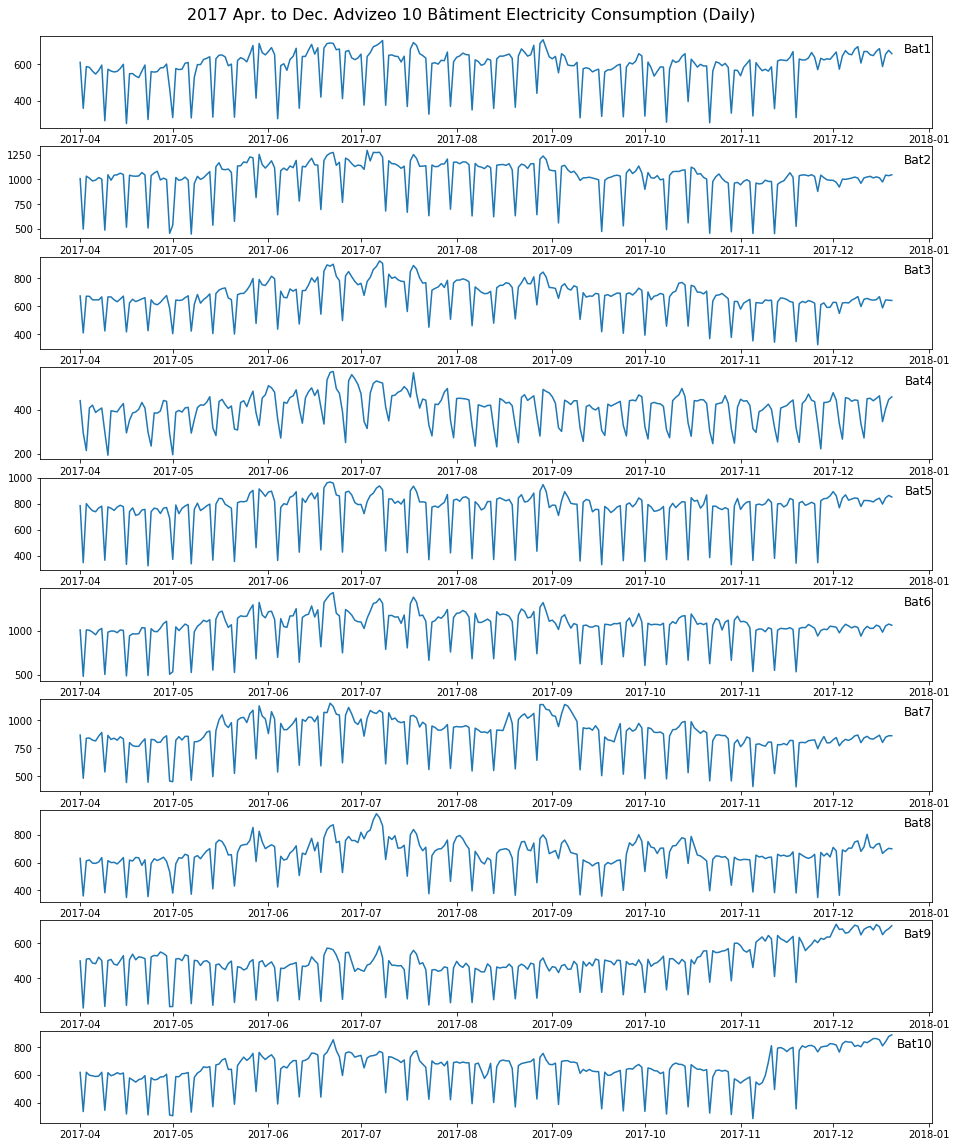

In [126]:
bats = ['Bat1', 'Bat2', 'Bat3', 'Bat4', 'Bat5', 'Bat6', 'Bat7', 'Bat8', 'Bat9', 'Bat10']
i = 1

fig = plt.figure(figsize=(16, 2*len(bats)))

for bat in bats:
    ax = fig.add_subplot(len(bats),1,i)
    ax.plot(data_day_mean[bat])
    ax.set_title(bat, y=0.75, loc='right')
    i += 1

plt.suptitle('2017 Apr. to Dec. Advizeo 10 Bâtiment Electricity Consumption (Daily)', size=16, y=0.90 + 0.01*(10-len(bats)))
plt.show()

### 10 Bâtiment Monthly Electricity Consumption & Temperature Trend  Comparison Chart

In [127]:
dataset_paris_temperature = pd.read_csv('history_export_2019-01-14T08_12_42.csv',sep=';')

In [128]:
dataset_paris_temperature['Time'] = (
    dataset_paris_temperature['Year'].map(str) + '-' + 
    dataset_paris_temperature['Month'].map(str) + '-' + 
    dataset_paris_temperature['Day'].map(str) + ' ' + 
    dataset_paris_temperature['Hour'].map(str) + ':' + 
    dataset_paris_temperature['Minute'].map(str) 
)

In [129]:
dataset_paris_temperature = dataset_paris_temperature.drop(['Year','Month','Day','Hour','Minute'], axis=1)

In [130]:
dataset_paris_temperature['Time'] = pd.to_datetime(dataset_paris_temperature['Time'], format='%Y-%m-%d %H:%M')

In [131]:
dataset_paris_temperature = dataset_paris_temperature.set_index('Time')

In [132]:
temperature_month_mean = dataset_paris_temperature['Temperature'].resample('M').mean()

In [133]:
data_month_mean = dataset[['Bat1','Bat2','Bat3','Bat4','Bat5','Bat6','Bat7','Bat8','Bat9','Bat10']].resample('M').mean()

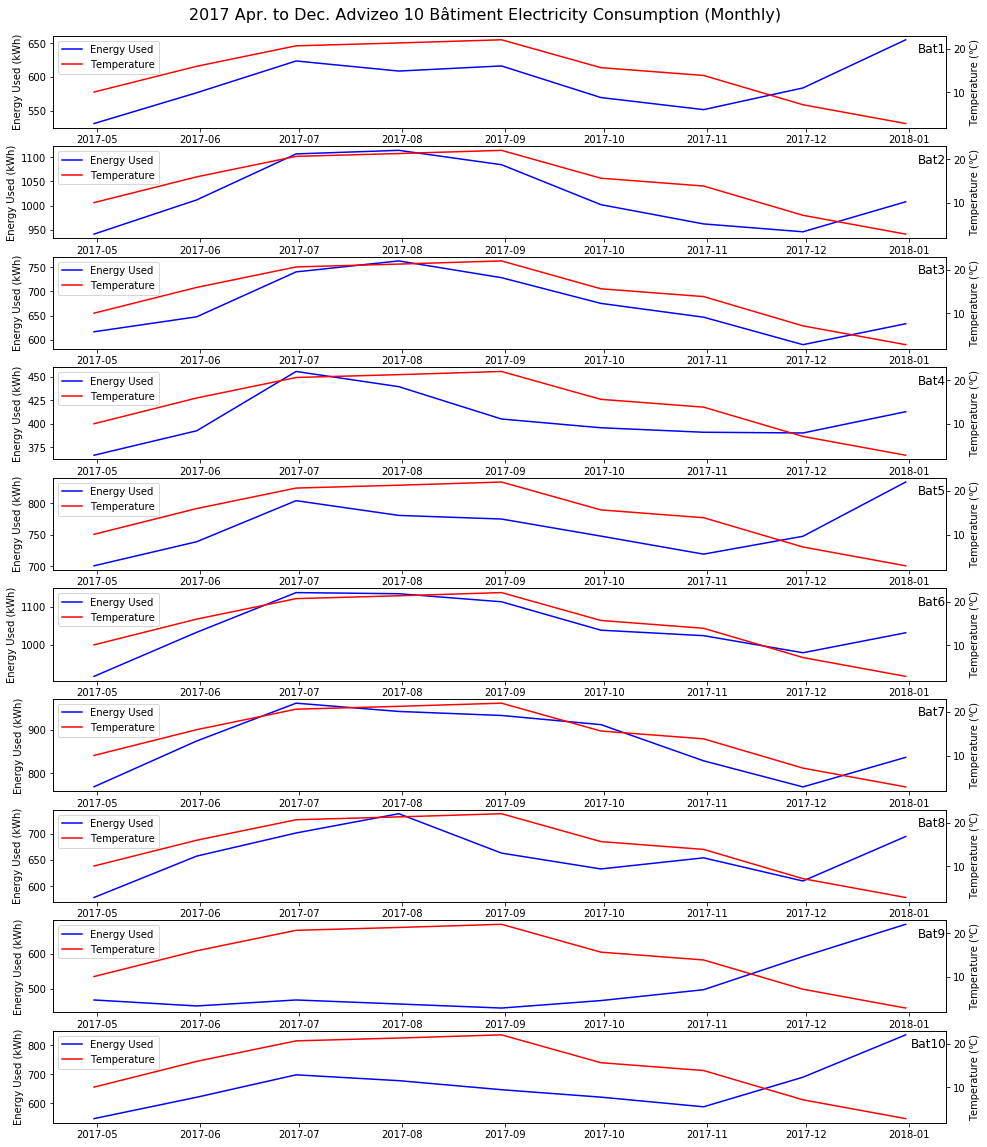

In [134]:
bats = ['Bat1', 'Bat2', 'Bat3', 'Bat4', 'Bat5', 'Bat6', 'Bat7', 'Bat8', 'Bat9', 'Bat10']
i = 1

fig = plt.figure(figsize=(16, 2*len(bats)))

for bat in bats:
    ax1 = fig.add_subplot(len(bats),1,i)
    ax1.plot(data_month_mean[bat], 'b-', label='Energy Used')
    
    ax2 = ax1.twinx()
    ax2.plot(temperature_month_mean, 'r-', label='Temperature')
    
    ax1.set_ylabel('Energy Used (kWh)',)
    ax2.set_ylabel('Temperature (℃)')
    
    ax1.set_title(bat, y=0.75, loc='right')
    i += 1
    
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    
    plt.legend(handles1+handles2, labels1+labels2, loc='upper left')
    
plt.suptitle('2017 Apr. to Dec. Advizeo 10 Bâtiment Electricity Consumption (Monthly)', size=16, y=0.90 + 0.01*(10-len(bats)))
plt.show()

By observing the Advizeo 10 Bâtiment Electricity Consumption graph, we can see that the power consumption of 10 Bâtiment has a very similar trend in the same time coordinates. Electricity usage is high on Business Day (Monday to Friday) and less on weekends (Saturday and Sunday). At the same time, electricity consumption is on an upward trend from May to July and from November to December, and it is declining from July to November, which may be related to air conditioning and heating power caused by temperature changes.

It is worth noting here that after mid-November, there is no significant difference in the power usage between business day and weekend, which makes the model unable to accurately predict the trend of power consumption. Since we don't know the type or background of the building, we can't explain it well. But this is a problem with the data itself, and it cannot be denied the availability of TCN in the power consumption forecasting problem.

---

## 1. Import Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('sample_data.csv', index_col=0, parse_dates=[0])
dataset.head()

,Bat1,Bat2,Bat3,Bat4,Bat5,Bat6,Bat7,Bat8,Bat9,Bat10
2017-04-01 00:00:00,387.0,542.0,484.0,443.0,367.0,681.0,632.0,508.0,277.0,468.0
2017-04-01 00:10:00,384.0,544.0,518.0,459.0,362.0,717.0,652.0,518.0,330.0,481.0
2017-04-01 00:20:00,373.0,540.0,532.0,467.0,361.0,732.0,639.0,504.0,334.0,472.0
2017-04-01 00:30:00,347.0,542.0,521.0,448.0,358.0,723.0,619.0,427.0,329.0,451.0
2017-04-01 00:40:00,342.0,549.0,504.0,455.0,372.0,661.0,639.0,408.0,326.0,406.0


---

## 2. Data Selection & Resampling

In [3]:
data = dataset[['Bat1','Bat2','Bat3','Bat4','Bat5','Bat6','Bat7','Bat8','Bat9','Bat10']].resample('D').mean()
data.head()

,Bat1,Bat2,Bat3,Bat4,Bat5,Bat6,Bat7,Bat8,Bat9,Bat10
2017-04-01,611.465278,1008.534722,672.979167,440.062500,784.402778,1007.013889,868.937500,631.215278,499.861111,619.166667
2017-04-02,357.479167,496.006944,408.298611,294.548611,345.555556,485.319444,481.236111,358.409722,229.173611,335.763889
2017-04-03,588.055556,1034.152778,671.263889,215.291667,800.229167,1006.263889,840.666667,613.354167,510.131944,620.451389
2017-04-04,583.986111,1013.388889,670.208333,407.069444,769.611111,1003.194444,842.597222,619.486111,513.451389,598.562500
2017-04-05,562.916667,985.159722,645.465278,419.652778,745.743056,981.590278,823.506944,596.513889,487.715278,594.541667


---

## 3. Prepare Training & Verification Timing Index

In [4]:
data_start_date = data.index[0]
data_end_date = data.index[-1]
print('Data ranges from %s to %s' % (data_start_date, data_end_date))

Data ranges from 2017-04-01 00:00:00 to 2017-12-20 00:00:00


In [5]:
from datetime import timedelta

pred_steps = 14
pred_length=timedelta(pred_steps)

first_day = pd.to_datetime(data_start_date) 
last_day = pd.to_datetime(data_end_date)

val_pred_start = last_day - pred_length + timedelta(1)
val_pred_end = last_day

train_pred_start = val_pred_start - pred_length
train_pred_end = val_pred_start - timedelta(days=1)

In [6]:
enc_length = train_pred_start - first_day

train_enc_start = first_day
train_enc_end = train_enc_start + enc_length - timedelta(1)

val_enc_start = train_enc_start + pred_length
val_enc_end = val_enc_start + enc_length - timedelta(1)

In [7]:
print('Train encoding:', train_enc_start, '-', train_enc_end)
print('Train prediction:', train_pred_start, '-', train_pred_end, '\n')
print('Val encoding:', val_enc_start, '-', val_enc_end)
print('Val prediction:', val_pred_start, '-', val_pred_end)

print('\nEncoding interval:', enc_length.days)
print('Prediction interval:', pred_length.days)

Train encoding: 2017-04-01 00:00:00 - 2017-11-22 00:00:00
Train prediction: 2017-11-23 00:00:00 - 2017-12-06 00:00:00 

Val encoding: 2017-04-15 00:00:00 - 2017-12-06 00:00:00
Val prediction: 2017-12-07 00:00:00 - 2017-12-20 00:00:00

Encoding interval: 236
Prediction interval: 14


---

## 4. Split Time Series Data Timing Index & Value

In [8]:
date_to_index = pd.Series(index=pd.Index([pd.to_datetime(c) for c in data.index]),
                          data=[i for i in range(len(data.index))])

series_array = data.T.values

---

## 5. Prepare the Data Formatting Function

In [9]:
def get_time_block_series(series_array, date_to_index, start_date, end_date):
    
    inds = date_to_index[start_date:end_date]
    return series_array[:,inds]

def transform_series_encode(series_array):
    
    series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_mean = series_array.mean(axis=1).reshape(-1,1) 
    series_array = series_array - series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array, series_mean

def transform_series_decode(series_array, encode_series_mean):
    
    series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_array = series_array - encode_series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array

---

## 6. Build Temporal Convolutional Network

In [10]:
from keras.models import Model
from keras.layers import Input, Conv1D, Dense, Dropout, Lambda, concatenate
from keras.optimizers import Adam

# convolutional layer parameters
n_filters = 32 
filter_width = 2
dilation_rates = [2**i for i in range(8)] 

# define an input history series and pass it through a stack of dilated causal convolutions. 
history_seq = Input(shape=(None, 1))
x = history_seq

for dilation_rate in dilation_rates:
    x = Conv1D(filters=n_filters,
               kernel_size=filter_width, 
               padding='causal',
               dilation_rate=dilation_rate)(x)

x = Dense(128, activation='relu')(x)
x = Dropout(.2)(x)
x = Dense(1)(x)

# extract the last 14 time steps as the training target
def slice(x, seq_length):
    return x[:,-seq_length:,:]

pred_seq_train = Lambda(slice, arguments={'seq_length':14})(x)

model = Model(history_seq, pred_seq_train)

Using TensorFlow backend.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 32)          96        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 32)          2080      
__________

---

## 7. Train Temporal Convolutional Network

In [12]:
batch_size = 7
epochs = 50

In [13]:
# sample of series from train_enc_start to train_enc_end  
encoder_input_data = get_time_block_series(series_array, 
                                           date_to_index, 
                                           train_enc_start, 
                                           train_enc_end)[1:]

encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

In [14]:
# sample of series from train_pred_start to train_pred_end 
decoder_target_data = get_time_block_series(series_array, 
                                            date_to_index, 
                                            train_pred_start, 
                                            train_pred_end)[1:]

decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

In [15]:
# we append a lagged history of the target series to the input data, 
# so that we can train with teacher forcing
lagged_target_history = decoder_target_data[:,:-1,:1]
encoder_input_data = np.concatenate([encoder_input_data, lagged_target_history], axis=1)

In [16]:
model.compile(Adam(), loss='mean_absolute_error')
history = model.fit(encoder_input_data, decoder_target_data,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)

Train on 7 samples, validate on 2 samples
Epoch 1/50
7/7 [==============================] - 1s 141ms/step - loss: 0.1132 - val_loss: 0.2998
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.1006 - val_loss: 0.2931
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0918 - val_loss: 0.2954
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0910 - val_loss: 0.2908
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0838 - val_loss: 0.2881
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0878 - val_loss: 0.2854
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0846 - val_loss: 0.2801
Epoch 8/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0818 - val_loss: 0.2695
Epoch 9/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0821 - val_loss: 0.2606
Epoch 10/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0765 - val_loss: 0.

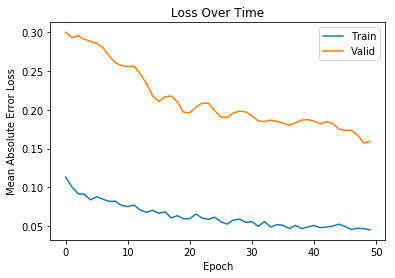

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

---

## 8. Use Temporal Convolutional Network to Predict

In [18]:
def predict_sequence(input_sequence):

    history_sequence = input_sequence.copy()
    pred_sequence = np.zeros((1,pred_steps,1)) # initialize output (pred_steps time steps)  
    
    for i in range(pred_steps):
        
        # record next time step prediction (last time step of model output) 
        last_step_pred = model.predict(history_sequence)[0,-1,0]
        pred_sequence[0,i,0] = last_step_pred
        
        # add the next time step prediction to the history sequence
        history_sequence = np.concatenate([history_sequence, 
                                           last_step_pred.reshape(-1,1,1)], axis=1)

    return pred_sequence

In [19]:
encoder_input_data = get_time_block_series(series_array, date_to_index, val_enc_start, val_enc_end)
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

decoder_target_data = get_time_block_series(series_array, date_to_index, val_pred_start, val_pred_end)
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

In [20]:
def predict_and_plot(encoder_input_data, decoder_target_data, sample_ind, enc_tail_len=50):

    encode_series = encoder_input_data[sample_ind:sample_ind+1,:,:]
    pred_series = predict_sequence(encode_series)
    
    encode_series = encode_series.reshape(-1,1)
    pred_series = pred_series.reshape(-1,1)   
    target_series = decoder_target_data[sample_ind,:,:1].reshape(-1,1) 
    
    encode_series_tail = np.concatenate([encode_series[-enc_tail_len:],target_series[:1]])
    x_encode = encode_series_tail.shape[0]
    
    plt.figure(figsize=(10,6))   
    
    plt.plot(range(1,x_encode+1),encode_series_tail)
    plt.plot(range(x_encode,x_encode+pred_steps),target_series,color='orange')
    plt.plot(range(x_encode,x_encode+pred_steps),pred_series,color='teal',linestyle='--')
    
    plt.title('Encoder Series Tail of Length %d, Target Series, and Predictions' % enc_tail_len)
    plt.legend(['Encoding Series','Target Series','Predictions'])

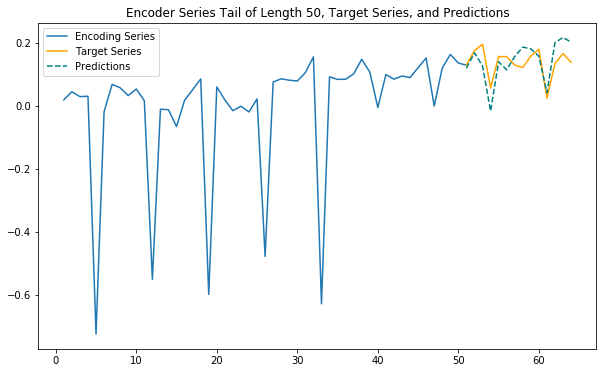

In [21]:
predict_and_plot(encoder_input_data, decoder_target_data, 0)

---

# -END-